### source: 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py

### modified by: 
[morkapronczay](https://github.com/morkapronczay)

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets
import seaborn as sns
import pandas as pd
import statsmodels

### CREATE PROBLEM

In [3]:
n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

In [4]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

### FIT SIMPLE REGRESSION

In [5]:
# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html

* is_data_valid
* is_model_valid -> costly
* residual_threshold

### SET PARAMETERS FOR RANSAC AND FIT

In [78]:
def data_validation(X_sample, y_sample, X_mean=np.mean(X), y_mean=np.mean(y)):
    if (abs(X_mean - np.mean(X_sample)) < np.std(X)) & (abs(y_mean - np.mean(y_sample)) < np.std(y)):
        return True
    else:
        return False

# default value
residual_tresh = statsmodels.robust.mad(y)

In [79]:
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor(min_samples=20, is_data_valid=data_validation, residual_threshold=residual_tresh)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [80]:
# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

In [81]:
# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


### SHOW REGRESSIONS SEPARATELY

In [16]:
df = pd.DataFrame(X, columns = ['input'])
df['target'] = y

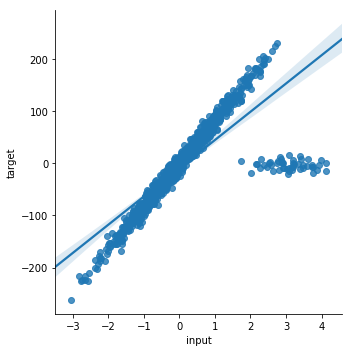

In [18]:
sns.lmplot(x='input', y='target', data=df)

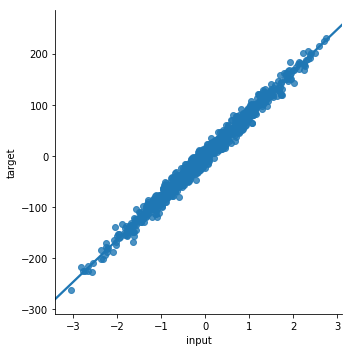

In [19]:
sns.lmplot(x='input', y='target', data=df[inlier_mask])

### PLOT TOGETHER

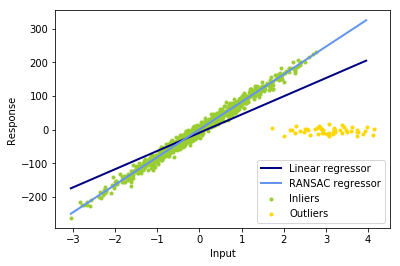

In [9]:
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()